# `MNIST` Handwritten digits recognition hands-on

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import math
import datetime

import tensorflow as tf

In [7]:
os.getcwd()

'C:\\Users\\thesi\\OneDrive\\INTELLIPAAT\\DL Sessions\\09. AI and DL IITR-07Sep2025(M)'

### Load the `MNIST` data

The **training** dataset consists of `60000 - 28x28 px` images of hand-written digits from `0` to `9`.

The **test** dataset consists of `10000 - 28x28 px` images.

In [13]:
mnist_dataset = tf.keras.datasets.mnist

In [15]:
mnist_dataset

<module 'keras.api.datasets.mnist' from 'C:\\Users\\thesi\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [17]:
(x_train, y_train) , (x_test, y_test) = mnist_dataset.load_data()

In [19]:
x_train[0] # the very first handwritten digit data from the training dataset

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [21]:
print("Shape of the training data:", x_train.shape)

Shape of the training data: (60000, 28, 28)


In [23]:
print("Dim of the training data:", x_train.ndim)

Dim of the training data: 3


In [27]:
print('Shape of x_train dataset:', x_train.shape)
print('Shape of y_train dataset:', y_train.shape)
print('Shape of x_test dataset:', x_test.shape)
print('Shape of y_test dataset:', y_test.shape)

Shape of x_train dataset: (60000, 28, 28)
Shape of y_train dataset: (60000,)
Shape of x_test dataset: (10000, 28, 28)
Shape of y_test dataset: (10000,)


### Plotting some of the handwritten digits images from the `training dataset`

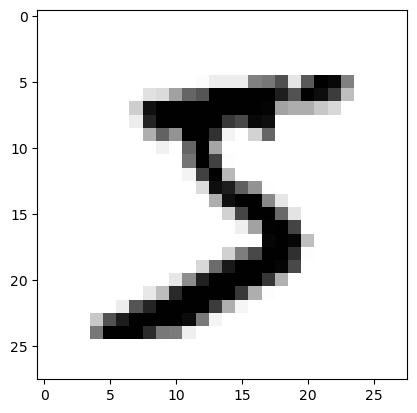

In [30]:
plt.figsize = (5, 5)
plt.imshow(x_train[0], cmap = plt.cm.binary) #first image from the training dataset
plt.show()

#### What if we need add the `label/class` for the image

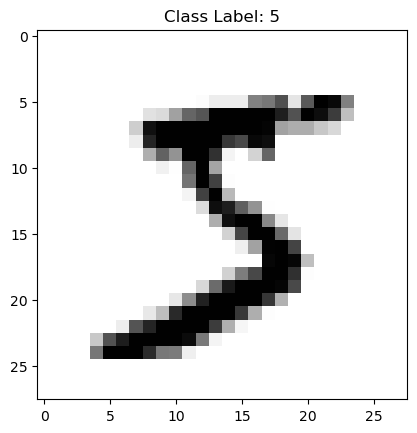

In [33]:
plt.figsize = (5, 5)
plt.imshow(x_train[0], cmap = plt.cm.binary) #first image from the training dataset
plt.title(f"Class Label: {y_train[0]}", fontsize=12)
plt.show()

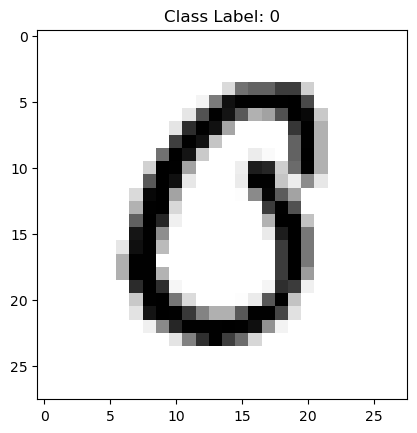

In [35]:
plt.figsize = (5, 5)
plt.imshow(x_train[234], cmap = plt.cm.binary) #first image from the training dataset
plt.title(f"Class Label: {y_train[234]}", fontsize=12)
plt.show()

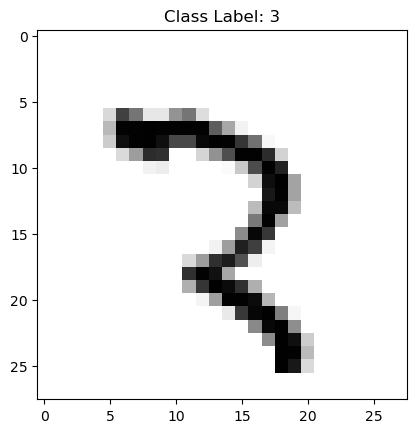

In [37]:
plt.figsize = (5, 5)
plt.imshow(x_train[500], cmap = plt.cm.binary) # image from the training dataset
plt.title(f"Class Label: {y_train[500]}", fontsize=12)
plt.show()

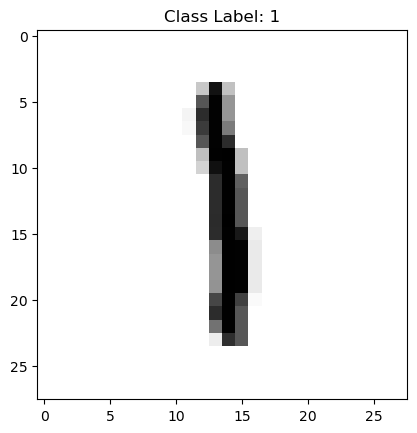

In [39]:
plt.figsize = (5, 5)
plt.imshow(x_train[2616], cmap = plt.cm.binary) # image from the training dataset
plt.title(f"Class Label: {y_train[2616]}", fontsize=12)
plt.show()

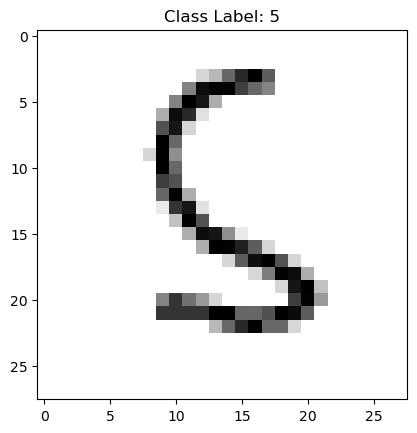

In [41]:
plt.figsize = (5, 5)
plt.imshow(x_train[4562], cmap = plt.cm.binary) # image from the training dataset
plt.title(f"Class Label: {y_train[4562]}", fontsize=12)
plt.show()

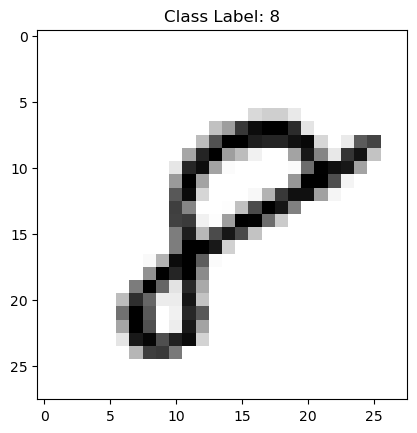

In [43]:
plt.figsize = (5, 5)
plt.imshow(x_train[59999], cmap = plt.cm.binary) #last image from the training dataset
plt.title(f"Class Label: {y_train[59999]}", fontsize=12)
plt.show()

### Plot `a few` handwritten digits from the `training dataset`

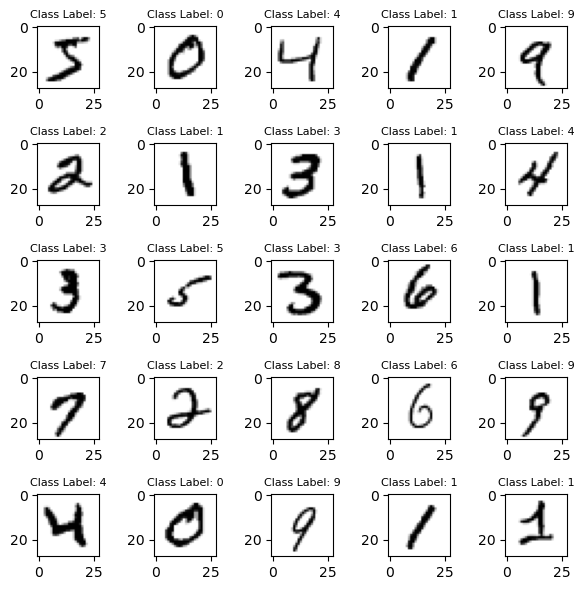

In [52]:
#### Select how many digits you want to plot
n=25

num_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(6,6))

for i in range(n):
    
    plt.subplot(num_cells, num_cells, i+1)
    plt.title(f"Class Label: {y_train[i]}", fontsize=8)
    plt.imshow(x_train[i], cmap = plt.cm.binary) # image from the training dataset

plt.tight_layout() #prevents overlap of titles & subplots
plt.show()
        

### TASK: Can you guys make it `randomly sampled/ shuffled` and then plot a few images

### Plot `a few` handwritten digits from the `testing dataset`

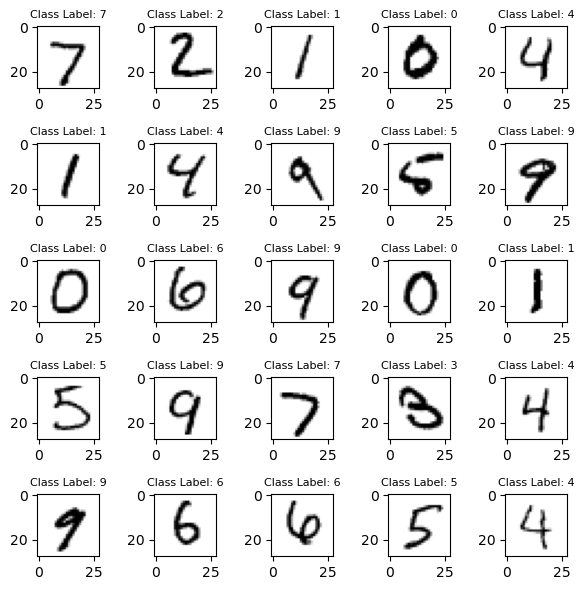

In [58]:
#### Select how many digits you want to plot
n=25

num_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(6,6))

for i in range(n):
    
    plt.subplot(num_cells, num_cells, i+1)
    plt.title(f"Class Label: {y_test[i]}", fontsize=8)
    plt.imshow(x_test[i], cmap = plt.cm.binary) # image from the training dataset

plt.tight_layout() #prevents overlap of titles & subplots
plt.show()
        

## Let us build the model

# Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: **Flatten** (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **First Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Second Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. `Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).`


In [115]:
model = tf.keras.models.Sequential() # creates the model object of the class `Sequential` which is basically a linear stack of layers

In [117]:
model

<Sequential name=sequential_3, built=False>

### Scale the `x_train` and `x_test` from `[0-255]` to `[0-1]`

In [81]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [83]:
x_train.min(), x_train.max()

(0, 255)

In [85]:
x_train_normalized.min(), x_train_normalized.max()

(0.0, 1.0)

In [119]:
### Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train_normalized.shape[1:]))

### First Hidden Layer having size (no. of neurons = 28)
model.add(tf.keras.layers.Dense(
    units = 128,
    activation=tf.keras.activations.relu
))

### Second Hidden Layer having size 128
model.add(tf.keras.layers.Dense(
    units = 128,
    activation=tf.keras.activations.relu
))


### Output Layer
model.add(tf.keras.layers.Dense(
    units=10,
    activation = tf.keras.activations.softmax
))


In [121]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [124]:
adam_optimizer =tf.keras.optimizers.Adam(learning_rate=0.01)

In [126]:
model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [128]:
### Train and validate the model
training_hist = model.fit(x_train_normalized, y_train, epochs = 30, validation_data=(x_test_normalized, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8821 - loss: 0.3846 - val_accuracy: 0.9488 - val_loss: 0.1873
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9524 - loss: 0.1749 - val_accuracy: 0.9428 - val_loss: 0.2177
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.1557 - val_accuracy: 0.9514 - val_loss: 0.1909
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9640 - loss: 0.1356 - val_accuracy: 0.9630 - val_loss: 0.1538
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9668 - loss: 0.1279 - val_accuracy: 0.9644 - val_loss: 0.1542
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9692 - loss: 0.1214 - val_accuracy: 0.9610 - val_loss: 0.1934
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9721 - loss: 0.1087 - val_accuracy: 0.9613 - val_loss: 0.1843
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9732 - loss: 0.1037 - 

In [134]:
print("Default batch size taken is", 60000/32)

Default batch size taken is 1875.0
